In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

# Loading the dataset
df = pd.read_csv('customer_churn.csv')

Data Manipulation

In [2]:
# a. Extract the 5th column & store it in ‘customer_5’
customer_5 = df.iloc[:, 4]

In [3]:
# b. Extract the 15th column & store it in ‘customer_15’
customer_15 = df.iloc[:, 14]

In [4]:
# c. Extract all the male senior citizens whose Payment Method is Electronic check &
# store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & 
                            (df['PaymentMethod'] == 'Electronic check')]

In [5]:
# d. Extract all those customers whose tenure is greater than 70 months or their
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

In [6]:
# e. Extract all the customers whose Contract is of two years, payment method is Mailed
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & 
                  (df['Churn'] == 'Yes')]

In [7]:
# f. Extract 333 random records from the customer_churndataframe& store the result in
# ‘customer_333’
customer_333 = df.sample(n=333)

In [8]:
# g. Get the count of different levels from the ‘Churn’ column
churn_count = df['Churn'].value_counts()

Data Visualization

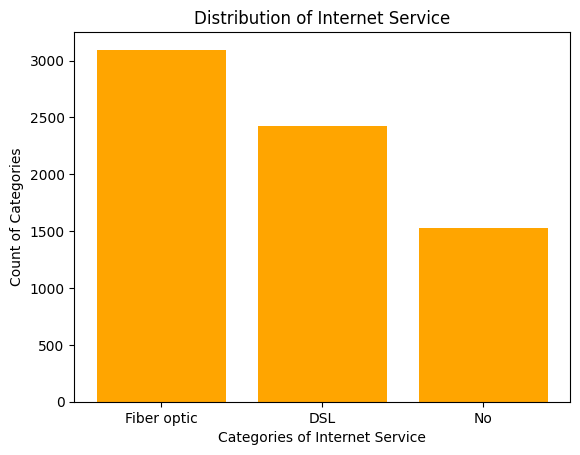

In [21]:
# a. Build a bar-plot for the ’InternetService’ column:
internet_counts = df['InternetService'].value_counts()
plt.bar(x=internet_counts.keys(), height=internet_counts.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

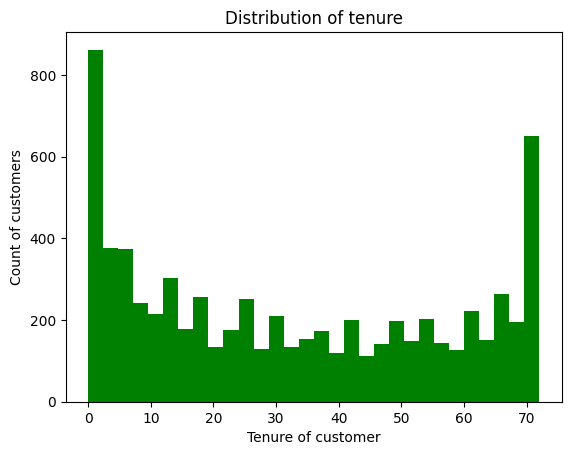

In [22]:
# b. Build a histogram for the ‘tenure’ column:
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.xlabel('Tenure of customer')
plt.ylabel('Count of customers')
plt.show()

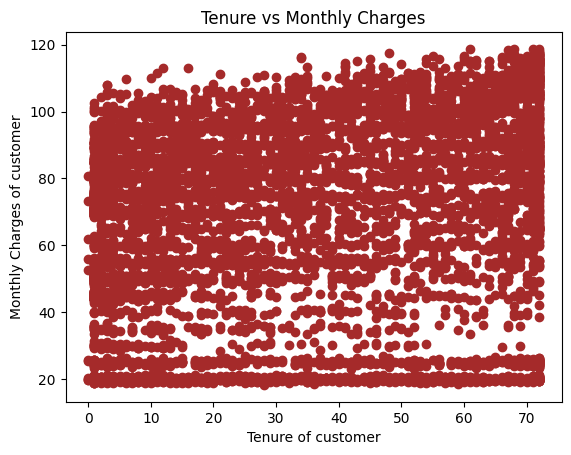

In [24]:
# c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
# the y-axis & ‘tenure’ to the ‘x-axis’:
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

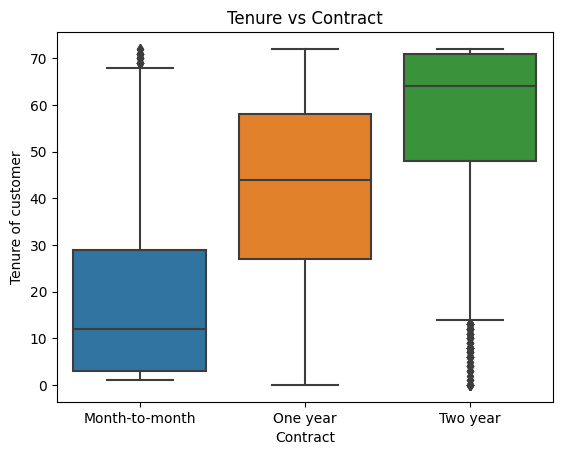

In [25]:
# d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# ‘Contract’ on the x-axis.
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')
plt.show()

Linear Regression

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
# independent variable is ‘tenure’

x=df[['tenure']]
y=df[['MonthlyCharges']]

#Divide the dataset into train and test sets in 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Build the model on train set and predict the values on test set

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

#After predicting the values, find the root mean square error
error = np.sqrt(mean_squared_error(y_test, y_pred))

print("The error in prediction is: ", error)

The error in prediction is:  29.394584027273893


Logistic Regression

In [35]:
#a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
# independent variable is ‘MonthlyCharges’

x = df[['MonthlyCharges']]
y = df['Churn']

#Divide the dataset in 65:35 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)

#Build the model on train set and predict the values on test set
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#Build the confusion matrix and get the accuracy score
cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmatrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
 [[1840    0]
 [ 626    0]]
Accuracy Score: 0.7461476074614761


In [36]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
# independent variables are ‘tenure’ & ‘MonthlyCharges’

x = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

#Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Build the model on train set and predict the values on test set
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#Build the confusion matrix and get the accuracy score
cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmatrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
 [[965  96]
 [190 158]]
Accuracy Score: 0.7970191625266146


Decision Tree

In [37]:
# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
# variable is ‘tenure’

x = df[['tenure']]
y = df['Churn']

#Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Build the model on train set and predict the values on test set
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

#Build the confusion matrix and calculate the accuracy
cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmatrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)


Confusion Matrix:
 [[965  76]
 [281  87]]
Accuracy Score: 0.7466288147622427


Random Forest

In [41]:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
# variables are ‘tenure’ and ‘MonthlyCharges'"Project 2 Customer Churn Dataset.ipynb"

x = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

#Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Build the model on train set and predict the values on test set
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

#Build the confusion matrix and calculate the accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)


Confusion Matrix:
[[1341  198]
 [ 308  266]]
Accuracy: 0.7605300520586843
